# Intelligent Character Recognition
## 1. Descriere

ICR (Intelligent Character Recognition) presupune un model de recunoaștere și extragere a textului cursiv din poze. Acest model reprezintă o variantă mai sofisticată a OCR (Optical Character Reader) prin faptul că se poate extrage text din orice tip de scris sau font cursiv. În general, pentru implementarea modelului se folosesc rețele neuronale pentru învățarea tipurilor de scris, ce pot avea grade variate de acuratețe.

Pentru setul de date, s-a ales setul Handwriting Recognition (https://www.kaggle.com/datasets/landlord/handwriting-recognition), ce conține 400 de mii de nume scrise de mână, dintre care:
- 206799 prenume
- 207024 nume

Aceste date sunt mai apoi împărțite în:
- set de antrenament (331059 nume)
- set de testare (41382 nume)
- set de validare (41382 nume)

### 1.1 Dependințe

In [1]:
import opendatasets as od
from os.path import isdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import tensorflow as tf
from copy import deepcopy
from PIL import Image

### 1.2 Încărcarea datelor de antrenament, testare și validare

In [2]:
if not isdir("handwriting-recognition"):
    od.download("https://www.kaggle.com/datasets/landlord/handwriting-recognition")

train_data = pd.read_csv("handwriting-recognition/written_name_train_v2.csv")
#train_imgs, train_labels = np.array([np.asarray(Image.open('handwriting-recognition/train_v2/train/'+filename)) for filename in np.array(train_data['FILENAME'])], dtype="object"), np.array(train_data['IDENTITY'])

test_data = pd.read_csv("handwriting-recognition/written_name_test_v2.csv")
#test_imgs, test_labels = np.array([np.asarray(Image.open('handwriting-recognition/test_v2/test/'+filename)) for filename in np.array(test_data['FILENAME'])], dtype="object"), np.array(test_data['IDENTITY'])

validation_data = pd.read_csv("handwriting-recognition/written_name_validation_v2.csv")
#validation_imgs, validation_labels = np.array([np.asarray(Image.open('handwriting-recognition/validation_v2/validation/'+filename)) for filename in np.array(validation_data['FILENAME'])], dtype="object"), np.array(validation_data['IDENTITY'])

### 1.3 Curățarea datelor

Datele de intrare dintr-un set pot să nu fie corect etichetate, etichetele să fie goale sau să fie etichetate cu "UNREADABLE". Dacă eticheta este scrisă cu litere mici, atunci se va schimba în litere mari. Altfel, pentru date corupte sau goale se va aplica ștergerea lor. Datorită tipului de date, nu se va verifica unicitatea.

#### 1.3.1 Date fără etichetă

In [3]:
noEmptyLabels = train_data['IDENTITY'].isnull().sum()
if noEmptyLabels > 0:
    print('Number of NaN label values on train dataset: ', noEmptyLabels)
    train_data.dropna(axis=0, inplace=True)

noEmptyLabels = test_data['IDENTITY'].isnull().sum()
if noEmptyLabels > 0:
    print('Number of NaN label values on test dataset: ', noEmptyLabels)
    test_data.dropna(axis=0, inplace=True)

noEmptyLabels = validation_data['IDENTITY'].isnull().sum()
if noEmptyLabels > 0:
    print('Number of NaN label values on validation dataset: ', noEmptyLabels)
    validation_data.dropna(axis=0, inplace=True)

Number of NaN label values on train dataset:  565
Number of NaN label values on test dataset:  70
Number of NaN label values on validation dataset:  78


#### 1.3.2 Schimbare în majuscule

In [6]:
train_data = train_data['IDENTITY'].str.upper()
print(train_data.head())
test_data = test_data['IDENTITY'].str.upper()
validation_data = validation_data['IDENTITY'].str.upper()

KeyError: 'IDENTITY'

#### 1.3.3 Identificarea datelor marcate ca nelizibile

In [5]:
unreadable = train_data[train_data['IDENTITY'] == 'UNREADABLE']
# unreadable.reset_index(inplace=True, drop=True)

if len(unreadable):
    fig,axes = plt.subplots(nrows=5, ncols=1, figsize=(50, 20))
    for i, filename in enumerate(unreadable['FILENAME'][:5]):
        print(filename)
        axes[i].imshow(Image.open('handwriting-recognition/train_v2/train/' + filename).convert('LA'))
    plt.show()
    train_data = train_data[train_data['IDENTITY'] != 'UNREADABLE']

test_data = test_data[test_data['IDENTITY'] != 'UNREADABLE']
validation_data = validation_data[validation_data['IDENTITY'] != 'UNREADABLE']

KeyError: 'IDENTITY'

### 1.4 Exemple din setul de date

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Andrei Usurelu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas\_libs\index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 146, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index_class_helper.pxi", line 49, in pandas._libs.index.Int64Engine._check_type
KeyError: 'FILENAME'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Andrei Usurelu\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
  File "C:\Users\Andrei Usurelu\AppData\Local\Temp\ipykernel_21456\1732977348.py", line 3, in <module>
    print(train_data['FILENAME'][idxs])
          ~~~~~~~~~~^^^^^^^^^^^^
  File "c:\Users\Andrei 

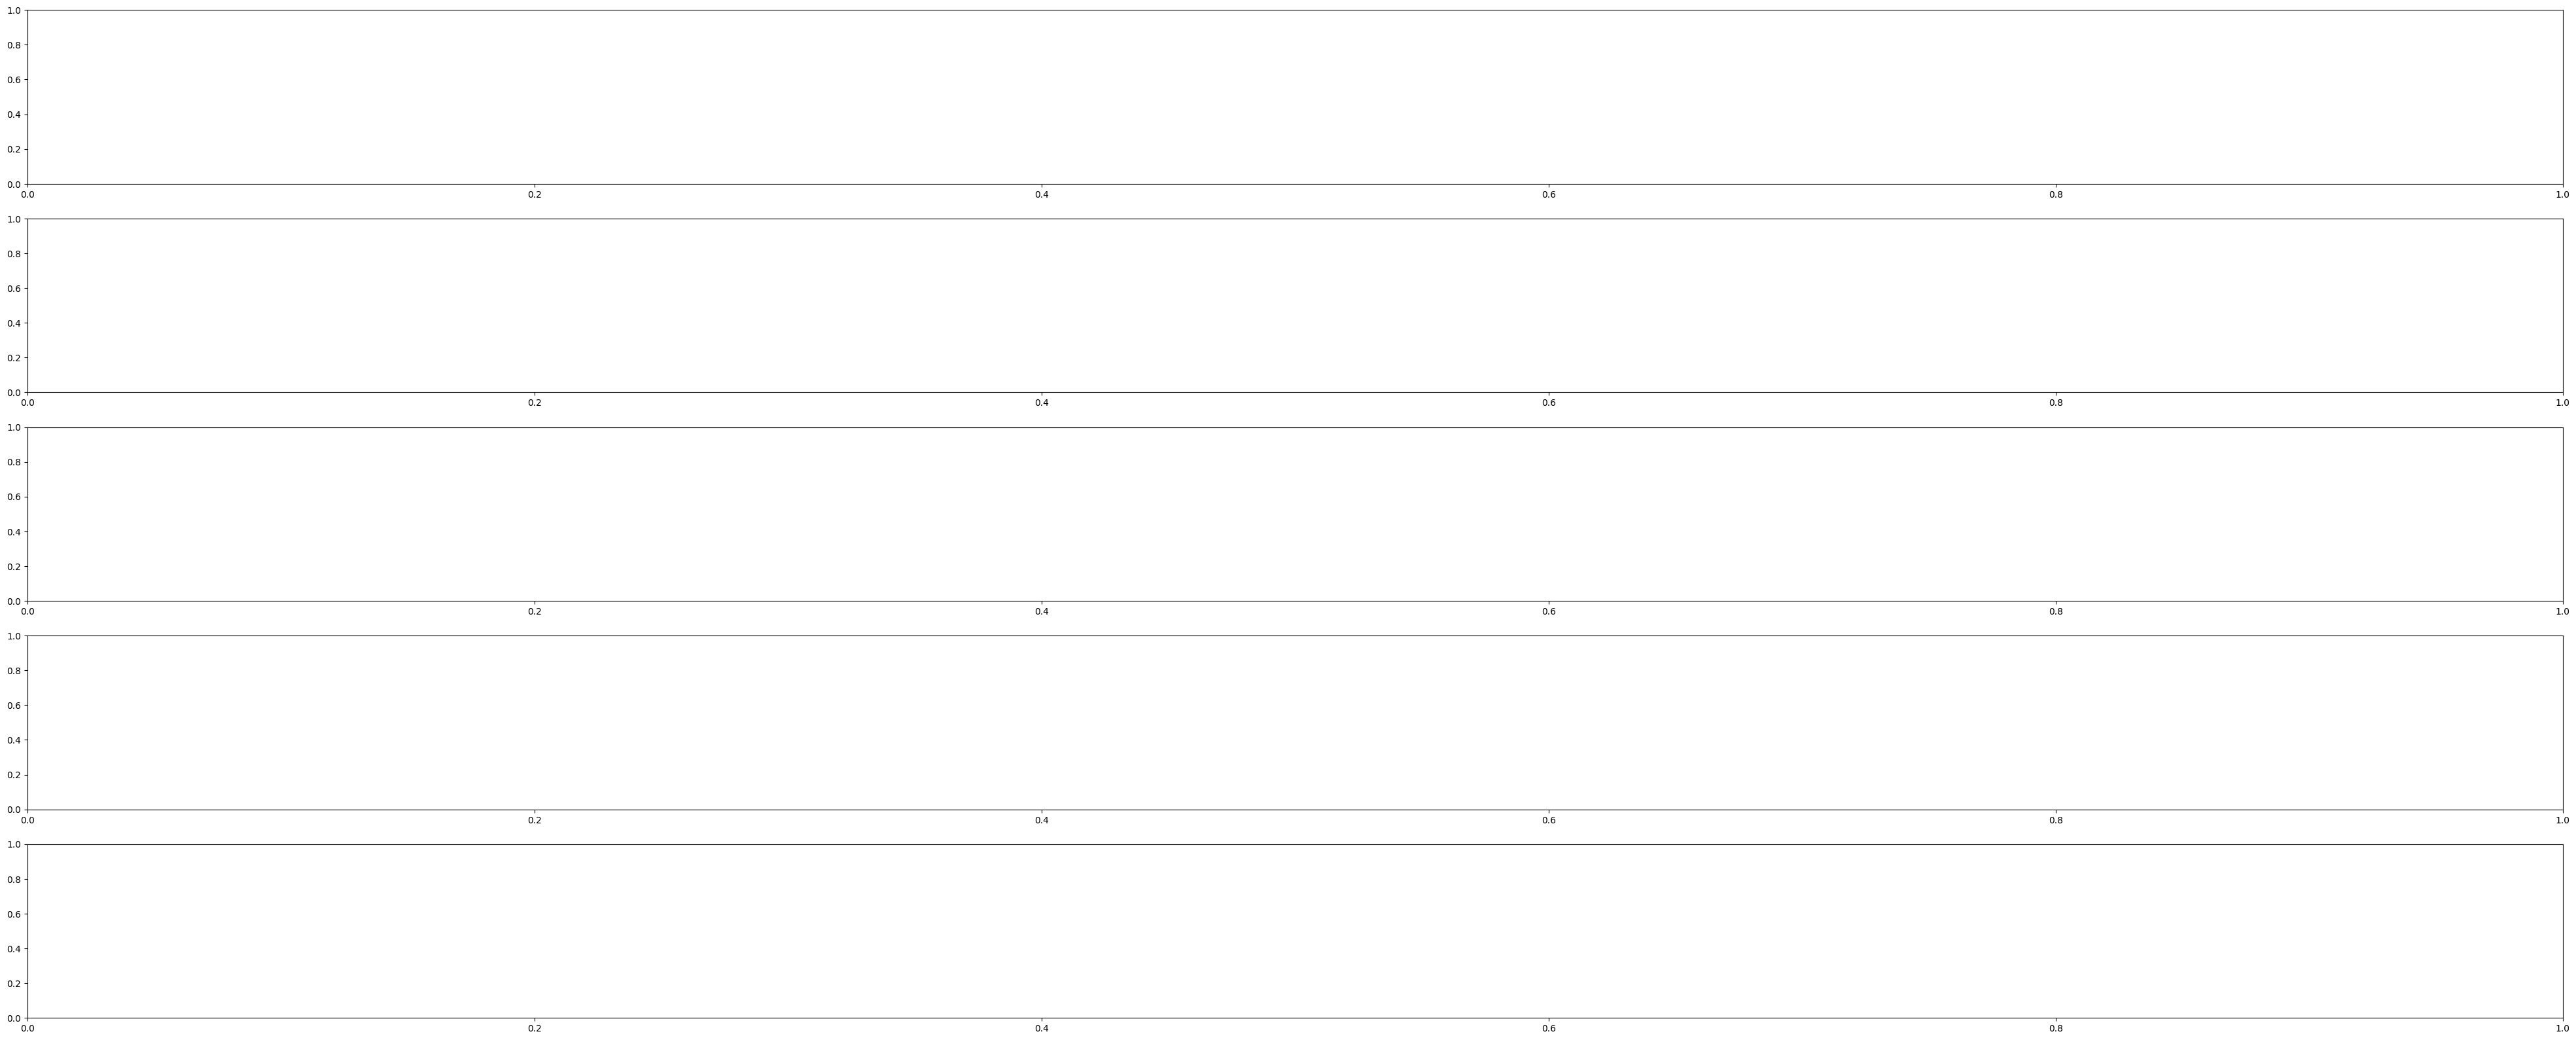

In [ ]:
idxs = np.random.randint(0, len(train_data), 5)
fig,axes = plt.subplots(nrows=5, ncols=1, figsize=(50, 20))
print(train_data['FILENAME'][idxs])
for i, idx in enumerate(idxs):
    axes[i].imshow(Image.open('handwriting-recognition/train_v2/train/' + train_data['FILENAME'][idx]).convert('LA'))

plt.show()

print(train_data['IDENTITY'][idxs])

### 1.4 Standardizarea datelor

Datele de intrare (imaginile) vor fi rescalate pentru a avea media zero și deviația standard 1.

## 2. Construirea unei rețele de tip feed-forward

## 3. Construirea unei rețele convoluționale

## 4. Construirea unei rețele recurente